In [1]:
import sys
sys.path.append('..')  # allow this notebook to find equal-level directories

import os
import pyomo.environ as oe
import pandas as pd
from pyomo.opt import SolverFactory, SolverManagerFactory
from amplpy import AMPL, Environment

from util.subproblem_model_loadobjective import build_subproblem_model
from util.subproblem_dataloader import DataLoader
from util.subproblem_solver_ipopt import SolveAndParse
from util.gjh_wrapper import gjh_solve, make_df
from vis.acres_bars import acres_bars
from vis.zL_bars import zL_bars

%pylab inline
from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
baseexppath = '/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/'
projectpath = os.path.join(baseexppath, 'ampl/OptEfficiencySubProblem/')
amplappdir = os.path.join(baseexppath, 'ampl/amplide.macosx64/')
ampl = AMPL(Environment(amplappdir))

In [3]:
from sys import path as pylib #im naming it as pylib so that we won't get confused between os.path and sys.path 

# pylib += [os.path.abspath(os.path.join(ROOT_DIR, '../castjeeves'))]

pylib.append(os.path.abspath('/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/CastJeeves'))
# print(pylib)
from CastJeeves.jeeves import Jeeves

In [4]:
cj = Jeeves()
# print(cj.geo.all_geotypes())

## Load data for each set, parameter, etc. to define a problem instance

In [5]:
data = DataLoader(save2file=False)

# ---- Cost bound ----
data.totalcostupperbound = 2827702
costboundstr = str(round(data.totalcostupperbound, 1))

# ---- Solver name ----
localsolver = True
solvername = 'ipopt'
# solvername = 'minos'

In [6]:
data.phi

{('N51133RL0_6450_0000', 'aop', 'N'): 111.7,
 ('N51133RL0_6450_0000', 'aop', 'P'): 14.2,
 ('N51133RL0_6450_0000', 'aop', 'S'): 199.9,
 ('N51133RL0_6450_0000', 'cch', 'N'): 0.0,
 ('N51133RL0_6450_0000', 'cch', 'P'): 0.0,
 ('N51133RL0_6450_0000', 'cch', 'S'): 0.0,
 ('N51133RL0_6450_0000', 'cci', 'N'): 0.0,
 ('N51133RL0_6450_0000', 'cci', 'P'): 0.0,
 ('N51133RL0_6450_0000', 'cci', 'S'): 0.0,
 ('N51133RL0_6450_0000', 'ccn', 'N'): 0.0,
 ('N51133RL0_6450_0000', 'ccn', 'P'): 0.0,
 ('N51133RL0_6450_0000', 'ccn', 'S'): 0.0,
 ('N51133RL0_6450_0000', 'cfr', 'N'): 0.0,
 ('N51133RL0_6450_0000', 'cfr', 'P'): 0.0,
 ('N51133RL0_6450_0000', 'cfr', 'S'): 0.0,
 ('N51133RL0_6450_0000', 'cir', 'N'): 0.0,
 ('N51133RL0_6450_0000', 'cir', 'P'): 0.0,
 ('N51133RL0_6450_0000', 'cir', 'S'): 0.0,
 ('N51133RL0_6450_0000', 'cmo', 'N'): 0.0,
 ('N51133RL0_6450_0000', 'cmo', 'P'): 0.0,
 ('N51133RL0_6450_0000', 'cmo', 'S'): 0.0,
 ('N51133RL0_6450_0000', 'cnr', 'N'): 0.0,
 ('N51133RL0_6450_0000', 'cnr', 'P'): 0.0,
 ('N51

### Create concrete problem instance using the separately defined optimization model

In [7]:
# Note that there is no need to call create_instance on a ConcreteModel
mdl = build_subproblem_model(pltnts=data.PLTNTS,
                             lrsegs=data.LRSEGS,
                             bmps=data.BMPS,
                             bmpgrps=data.BMPGRPS,
                             bmpgrping=data.BMPGRPING,
                             loadsrcs=data.LOADSRCS,
                             bmpsrclinks=data.BMPSRCLINKS,
                             bmpgrpsrclinks=data.BMPGRPSRCLINKS,
                             c=data.c,
                             e=data.E,
                             phi=data.phi,
                             t=data.T,
                             totalcostupperbound=data.totalcostupperbound)

In [8]:
# Retain only the Nitrogen load objective, and deactivate the others
mdl.PercentReduction['P'].deactivate()
mdl.PercentReduction['S'].deactivate()


## Solve problem instance

In [9]:
myobj = SolveAndParse(instance=mdl, data=data, localsolver=localsolver, solvername=solvername)
merged_df = myobj.solve()
print('\nObjective is: %d' % oe.value(mdl.PercentReduction['N']))


Solver log file: 'logfile_loadobjective.log'
Solver solution file: '/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/ampl/OptEfficiencySubProblem/jnotebooks/tmp3lgi_2ts.pyomo.sol'
Solver problem files: ('/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/ampl/OptEfficiencySubProblem/jnotebooks/tmp3lgi_2ts.pyomo.nl',)
Ipopt 3.12.8: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt document

* grad_f[        280] = -2.2991782792654384e-07    ~  0.0000000000000000e+00  [ 2.299e-07]
* grad_f[        284] = -9.9674704299898055e-04    ~ -9.9689145827142056e-04  [ 1.444e-07]
* grad_f[        285] = -3.1453422084854826e-04    ~ -3.1441516057384433e-04  [ 1.191e-07]
* grad_f[        286] = -3.4455517849411425e-05    ~ -3.4816594052244909e-05  [ 3.611e-07]
* grad_f[        287] = -4.5501220491756574e-06    ~ -4.2632564145606011e-06  [ 2.869e-07]
* grad_f[        288] = -3.5627214472498629e-05    ~ -3.6237679523765109e-05  [ 6.105e-07]
* grad_f[        289] = -2.6127025900743620e-07    ~  0.0000000000000000e+00  [ 2.613e-07]
* grad_f[        291] = -1.6972517979367682e-06    ~ -1.4210854715202004e-06  [ 2.762e-07]
* grad_f[        293] = -8.3726751611914367e-04    ~ -8.3772988546115812e-04  [ 4.624e-07]
* grad_f[        294] = -2.6420874551278057e-04    ~ -2.6396662633487722e-04  [ 2.421e-07]
* grad_f[        295] = -2.8942634993505601e-05    ~ -2.9132252166164108e-05  [ 1.896e-07]

* grad_f[        558] = -1.5675974367899392e-05    ~ -1.6342482922482304e-05  [ 6.665e-07]
* grad_f[        559] = -1.1495891396327192e-07    ~  0.0000000000000000e+00  [ 1.150e-07]
* grad_f[        560] = -1.3256487163674702e-04    ~ -1.3287149158713873e-04  [ 3.066e-07]
* grad_f[        563] = -1.1562265698788175e-03    ~ -1.1564083024495631e-03  [ 1.817e-07]
* grad_f[        565] = -3.9968400705317249e-05    ~ -4.0500935938325711e-05  [ 5.325e-07]
* grad_f[        567] = -4.1327568788098400e-05    ~ -4.1922021409845911e-05  [ 5.945e-07]
* grad_f[        568] = -3.0307350044862594e-07    ~  0.0000000000000000e+00  [ 3.031e-07]
* grad_f[        570] = -1.9688120856066507e-06    ~ -1.4210854715202004e-06  [ 5.477e-07]
* grad_f[        572] = -9.9674704299898055e-04    ~ -9.9689145827142056e-04  [ 1.444e-07]
* grad_f[        573] = -3.1453422084854826e-04    ~ -3.1441516057384433e-04  [ 1.191e-07]
* grad_f[        574] = -3.4455517849411425e-05    ~ -3.4816594052244909e-05  [ 3.611e-07]

* grad_f[        828] = -2.8942634993505601e-05    ~ -2.9132252166164108e-05  [ 1.896e-07]
* grad_f[        829] = -3.8221025213075529e-06    ~ -3.5527136788005009e-06  [ 2.694e-07]
* grad_f[        830] = -2.9926860156898847e-05    ~ -3.0553337637684308e-05  [ 6.265e-07]
* grad_f[        831] = -2.1946701756624639e-07    ~  0.0000000000000000e+00  [ 2.195e-07]
* grad_f[        832] = -2.5307839130651703e-04    ~ -2.5295321393059567e-04  [ 1.252e-07]
* grad_f[        835] = -1.5549253870784099e-03    ~ -1.5553780485788593e-03  [ 4.527e-07]
* grad_f[        837] = -5.3750607845081836e-05    ~ -5.4001247917767614e-05  [ 2.506e-07]
* grad_f[        839] = -5.5578454577097849e-05    ~ -5.6132876125047915e-05  [ 5.544e-07]
* grad_f[        840] = -4.0758160405160045e-07    ~ -7.1054273576010019e-07  [ 3.030e-07]
* grad_f[        841] = -4.7000272671210311e-04    ~ -4.7037929107318632e-04  [ 3.766e-07]
* grad_f[        842] = -2.6477128047813586e-06    ~ -2.1316282072803006e-06  [ 5.161e-07]

* grad_f[       1123] = -2.5506810501284427e-05    ~ -2.4868995751603507e-05  [ 6.378e-07]
* grad_f[       1124] = -3.3513739054250784e-05    ~ -3.3395508580724709e-05  [ 1.182e-07]
* grad_f[       1128] = -1.0518740627639379e-06    ~ -1.4210854715202004e-06  [ 3.692e-07]
* grad_f[       1129] = -1.2812170961206653e-05    ~ -1.3145040611561853e-05  [ 3.329e-07]
* grad_f[       1130] = -4.2480855906781688e-05    ~ -4.2632564145606011e-05  [ 1.517e-07]
* grad_f[       1131] = -1.0430310693821479e-04    ~ -1.0444978215673473e-04  [ 1.467e-07]
* grad_f[       1132] = -5.1013621002568854e-05    ~ -5.0448534238967113e-05  [ 5.651e-07]
* grad_f[       1133] = -6.7027478108501568e-05    ~ -6.7146288529329468e-05  [ 1.188e-07]
* grad_f[       1134] = -5.4618346668382224e-05    ~ -5.4356519285647664e-05  [ 2.618e-07]

Derivative checker detected 722 error(s).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:     2628
Number of

In [10]:
temp_df = pd.DataFrame([[k.index(), mdl.dual[k]]
                            for k in mdl.dual.keys()],
                           columns=['key', 'value'])
# temp_df.dropna(inplace=True)
display(temp_df.tail(5))
print(temp_df.shape[0])

[mdl.BMPS[temp_df.key[x][0]] for x in range(1,temp_df.shape[0])]
# mdl.BMPS[temp_df.key[x][0] for x in temp_df.shape[0]]

,key,value
1103,"(115, N51133RL0_6450_0000, soy)",1.510736e-12
1104,"(115, N51133RL0_6450_0000, swm)",5.748889e-10
1105,"(115, N51133RL0_6450_0000, wat)",1.753441e-12
1106,"(115, N51133RL0_6450_0000, wfp)",3.072721e-12
1107,"(115, N51133RL0_6450_0000, wto)",3.044986e-12


1108


['AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'AgStormEff',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',
 'Filter',


In [11]:
# from util.solution_wrangler import get_dual_df
# dual_df = get_dual_df(mdl)
# display(dual_df.tail(5))

In [12]:
# display(dual_df.loc[dual_df.bmpshortname == 'HRTill'])
# display(dual_df.tail(20))

In [13]:
# tempdf_withduals = merged_df.merge(dual_df, how='left',
#                                    on=['bmpshortname', 'landriversegment', 'loadsource'])
# display(tempdf_withduals.head(30))

## Visualize

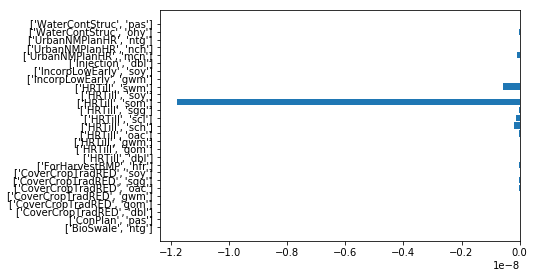

In [14]:
# ---- Make zL Figure ----
# zL_df_filtered = merged_df.loc[abs(merged_df['zL'])>0.45,:].copy()
keystrs = [str([x, y]) for x, y in zip(merged_df['bmpshortname'], merged_df['loadsource'])]
# Make Figure
fig = plt.figure(figsize=(10, 4))
rects = plt.barh(y=keystrs, width=merged_df['zL'])
ax = plt.gca()

ax.set_position([0.3,0.1,0.5,0.8])


filenamestr = ''.join(['output/loadobj_zL_costbound', costboundstr, '_', solvername, '_',
                       datetime.now().strftime('%Y-%m-%d_%H%M%S'),
                       '.png'])
plt.savefig(os.path.join(projectpath, filenamestr))

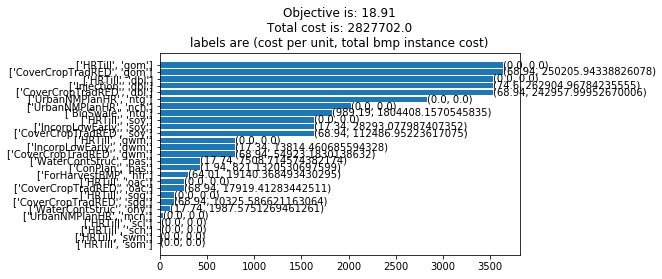

In [15]:
# ---- Acres Figure ----
sorteddf_byacres = merged_df.sort_values(by='acres')

filenamestr = ''.join(['output/loadobj_x_costbound', costboundstr, '_', solvername, '_',
                       datetime.now().strftime('%Y-%m-%d_%H%M%S'), '.png'])
savefilepathandname = os.path.join(projectpath, filenamestr)

objstr = ''.join(['Objective is: ', str(round(oe.value(mdl.PercentReduction['N']),2))])
coststr = ''.join(['Total cost is: ', str(round(oe.value(mdl.Total_Cost.body),1))])
titlestr = '\n'.join([objstr, coststr, 'labels are (cost per unit, total bmp instance cost)'])

acres_bars(df=sorteddf_byacres, instance=mdl, titlestr=titlestr,
           savefig=True, savefilepathandname=savefilepathandname)

## Gradient, Jacobian, Hessian

In [16]:
gjh_filename, g = gjh_solve(instance=mdl,
                            keepfiles=True,
                            amplenv=ampl,
                            basegjhpath=os.getcwd())

g_df = make_df(instance=mdl, filterbydf=merged_df, g=g)

g_df = sorteddf_byacres.merge(g_df, how='left',
                              on=['bmpshortname', 'landriversegment', 'loadsource'],
                              sort=False)

Solver log file: '/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/ampl/OptEfficiencySubProblem/jnotebooks/tmpfzqrefwi_gjh.log'
Solver solution file: '/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/ampl/OptEfficiencySubProblem/jnotebooks/tmp1vv0_arf.pyomo.sol'
Solver problem files: ('/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/ampl/OptEfficiencySubProblem/jnotebooks/tmp1vv0_arf.pyomo.nl',)
Variable component object x


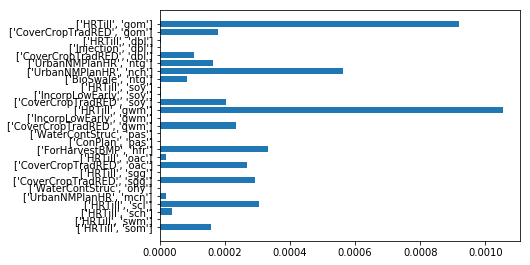

In [17]:
# ---- Make gradient Figure ----
# g_df_filtered = g_df.loc[abs(g_df['g'])>0.001,:].copy()
g_df_filtered = g_df
# sorteddf = g_df_filtered.sort_values(by='g')
# sorteddf_byacres

# sorteddf_byacres
# g_df = g_df.merge(sorteddf_byacres, how='right',
#                on=['bmpshortname', 'landriversegment', 'loadsource'])

keystrs = [str([x, y]) for x, y in zip(g_df_filtered['bmpshortname'], g_df_filtered['loadsource'])]
# Make Figure
fig = plt.figure(figsize=(10, 4))
rects = plt.barh(y=keystrs, width=g_df_filtered['g'])
ax = plt.gca()

ax.set_position([0.3,0.1,0.5,0.8])


filenamestr = ''.join(['output/loadobj_g_costbound', costboundstr, '_', solvername, '_',
                       datetime.now().strftime('%Y-%m-%d_%H%M%S'),
                       '.png'])
plt.savefig(os.path.join(projectpath, filenamestr))

## Use the IPOPT derivative test

In [18]:
solver = SolverFactory(solvername)

# Using the 'ipopt.opt' options file if in this same directory

mdl.jac_g = oe.Suffix(direction=oe.Suffix.IMPORT)
mdl.grad_f = oe.Suffix(direction=oe.Suffix.IMPORT)

results = solver.solve(mdl, tee=True, symbolic_solver_labels=True, keepfiles=True,
                       logfile='logfile_loadobjective_derivativetest.log')

Solver log file: 'logfile_loadobjective_derivativetest.log'
Solver solution file: '/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/ampl/OptEfficiencySubProblem/jnotebooks/tmpg59_fot2.pyomo.sol'
Solver problem files: ('/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/ampl/OptEfficiencySubProblem/jnotebooks/tmpg59_fot2.pyomo.nl',)
Ipopt 3.12.8: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see

* jac_g [  645,  133] =  1.0000000000000000e+00 v  ~  1.0000007932831068e+00  [ 7.933e-07]
* jac_g [    1,  134] =  7.0709999999999994e+01 v  ~  7.0687383413314819e+01  [ 3.200e-04]
* grad_f[        135] = -2.2573410319547774e-05    ~ -2.2026824808563106e-05  [ 5.466e-07]
* jac_g [    1,  135] =  7.0709999999999994e+01 v  ~  7.0687383413314819e+01  [ 3.200e-04]
* jac_g [  651,  135] =  1.0000000000000000e+00 v  ~  1.0000007932831068e+00  [ 7.933e-07]
* grad_f[        136] = -1.6565049772195033e-07    ~ -7.1054273576010019e-07  [ 5.449e-07]
* jac_g [    1,  136] =  7.0709999999999994e+01 v  ~  7.0687383413314819e+01  [ 3.200e-04]
* grad_f[        137] = -1.7562194217633781e-04    ~ -1.7550405573274475e-04  [ 1.179e-07]
* jac_g [    1,  137] =  7.0709999999999994e+01 v  ~  7.0687383413314819e+01  [ 3.200e-04]
* jac_g [  653,  137] =  1.0000000000000000e+00 v  ~  1.0000121619668789e+00  [ 1.216e-05]
* grad_f[        138] = -1.0756816053940637e-06    ~ -1.4210854715202004e-06  [ 3.454e-07]

* jac_g [    1,  249] =  6.8939999999999998e+01 v  ~  6.8917870521545410e+01  [ 3.211e-04]
* jac_g [  631,  249] =  1.0000000000000000e+00 v  ~  9.9998942459933460e-01  [ 1.058e-05]
* grad_f[        250] = -7.2770068787813800e-06    ~ -7.1054273576010019e-06  [ 1.716e-07]
* jac_g [    1,  250] =  6.8939999999999998e+01 v  ~  6.8917870521545410e+01  [ 3.211e-04]
* jac_g [  645,  250] =  1.0000000000000000e+00 v  ~  1.0000007932831068e+00  [ 7.933e-07]
* grad_f[        251] = -9.6101714710116457e-07    ~ -7.1054273576010019e-07  [ 2.505e-07]
* jac_g [    1,  251] =  6.8939999999999998e+01 v  ~  6.8917870521545410e+01  [ 3.211e-04]
* grad_f[        252] = -7.5244701065159247e-06    ~ -7.1054273576010019e-06  [ 4.190e-07]
* jac_g [    1,  252] =  6.8939999999999998e+01 v  ~  6.8917870521545410e+01  [ 3.211e-04]
* jac_g [  651,  252] =  1.0000000000000000e+00 v  ~  1.0000007932831068e+00  [ 7.933e-07]
* jac_g [    1,  253] =  6.8939999999999998e+01 v  ~  6.8917870521545410e+01  [ 3.211e-04]

* grad_f[        378] = -2.2573410319547774e-05    ~ -2.2026824808563106e-05  [ 5.466e-07]
* jac_g [    1,  378] =  6.6670000000000002e+01 v  ~  6.6636130213737488e+01  [ 5.083e-04]
* jac_g [  651,  378] =  1.0000000000000000e+00 v  ~  1.0000007932831068e+00  [ 7.933e-07]
* grad_f[        379] = -1.6565049772195033e-07    ~ -7.1054273576010019e-07  [ 5.449e-07]
* jac_g [    1,  379] =  6.6670000000000002e+01 v  ~  6.6682696342468262e+01  [ 1.904e-04]
* grad_f[        380] = -1.7562194217633781e-04    ~ -1.7550405573274475e-04  [ 1.179e-07]
* jac_g [    1,  380] =  6.6670000000000002e+01 v  ~  6.6682696342468262e+01  [ 1.904e-04]
* jac_g [  653,  380] =  1.0000000000000000e+00 v  ~  1.0000121619668789e+00  [ 1.216e-05]
* grad_f[        381] = -1.0756816053940637e-06    ~ -1.4210854715202004e-06  [ 3.454e-07]
* jac_g [    1,  381] =  6.6670000000000002e+01 v  ~  6.6636130213737488e+01  [ 5.083e-04]
* grad_f[        382] = -5.8176329273485546e-04    ~ -5.8157922921964200e-04  [ 1.841e-07]

* grad_f[        492] = -1.7315989574807160e-04    ~ -1.7301715615758440e-04  [ 1.427e-07]
* jac_g [    1,  492] =  6.6670000000000002e+01 v  ~  6.6636130213737488e+01  [ 5.083e-04]
* jac_g [  631,  492] =  1.0000000000000000e+00 v  ~  9.9998942459933460e-01  [ 1.058e-05]
* jac_g [    1,  493] =  6.6670000000000002e+01 v  ~  6.6636130213737488e+01  [ 5.083e-04]
* jac_g [  645,  493] =  1.0000000000000000e+00 v  ~  1.0000007932831068e+00  [ 7.933e-07]
* grad_f[        494] = -2.7228819167866330e-06    ~ -2.4868995751603507e-06  [ 2.360e-07]
* jac_g [    1,  494] =  6.6670000000000002e+01 v  ~  6.6682696342468262e+01  [ 1.904e-04]
* jac_g [    1,  495] =  6.6670000000000002e+01 v  ~  6.6636130213737488e+01  [ 5.083e-04]
* jac_g [  651,  495] =  1.0000000000000000e+00 v  ~  1.0000007932831068e+00  [ 7.933e-07]
* grad_f[        496] = -1.5644769229295309e-07    ~  0.0000000000000000e+00  [ 1.564e-07]
* jac_g [    1,  496] =  6.6670000000000002e+01 v  ~  6.6636130213737488e+01  [ 5.083e-04]

* jac_g [  626,  616] =  1.0000000000000000e+00 v  ~  9.9998942459933460e-01  [ 1.058e-05]
* grad_f[        617] = -8.7713739758404723e-04    ~ -8.7680973592796363e-04  [ 3.277e-07]
* jac_g [    1,  617] =  6.6670000000000002e+01 v  ~  6.6636130213737488e+01  [ 5.083e-04]
* jac_g [  630,  617] =  1.0000000000000000e+00 v  ~  9.9998942459933460e-01  [ 1.058e-05]
* jac_g [    1,  618] =  6.6670000000000002e+01 v  ~  6.6682696342468262e+01  [ 1.904e-04]
* jac_g [  631,  618] =  1.0000000000000000e+00 v  ~  9.9998942459933460e-01  [ 1.058e-05]
* grad_f[        619] = -3.0320861994922413e-05    ~ -2.9842794901924208e-05  [ 4.781e-07]
* jac_g [    1,  619] =  6.6670000000000002e+01 v  ~  6.6636130213737488e+01  [ 5.083e-04]
* jac_g [  645,  619] =  1.0000000000000000e+00 v  ~  1.0000007932831068e+00  [ 7.933e-07]
* jac_g [    1,  620] =  6.6670000000000002e+01 v  ~  6.6636130213737488e+01  [ 5.083e-04]
* jac_g [    1,  621] =  6.6670000000000002e+01 v  ~  6.6682696342468262e+01  [ 1.904e-04]

* grad_f[        717] = -2.3427515307092046e-04    ~ -2.3412383143295301e-04  [ 1.513e-07]
* jac_g [    1,  717] =  7.0349999999999994e+01 v  ~  7.0361420512199402e+01  [ 1.623e-04]
* jac_g [  631,  717] =  1.0000000000000000e+00 v  ~  9.9998942459933460e-01  [ 1.058e-05]
* grad_f[        718] = -2.7895193035328620e-05    ~ -2.7711166694643907e-05  [ 1.840e-07]
* jac_g [    1,  718] =  7.0349999999999994e+01 v  ~  7.0314854383468628e+01  [ 4.998e-04]
* jac_g [  645,  718] =  1.0000000000000000e+00 v  ~  1.0000007932831068e+00  [ 7.933e-07]
* grad_f[        719] = -3.6838990638877978e-06    ~ -3.5527136788005009e-06  [ 1.312e-07]
* jac_g [    1,  719] =  7.0349999999999994e+01 v  ~  7.0314854383468628e+01  [ 4.998e-04]
* grad_f[        720] = -2.8843802074977709e-05    ~ -2.8421709430404007e-05  [ 4.221e-07]
* jac_g [    1,  720] =  7.0349999999999994e+01 v  ~  7.0361420512199402e+01  [ 1.623e-04]
* jac_g [  651,  720] =  1.0000000000000000e+00 v  ~  1.0000007932831068e+00  [ 7.933e-07]

* jac_g [    1,  839] =  6.8939999999999998e+01 v  ~  6.8964436650276184e+01  [ 3.543e-04]
* jac_g [  651,  839] =  1.0000000000000000e+00 v  ~  1.0000007932831068e+00  [ 7.933e-07]
* grad_f[        840] = -3.5890941173089241e-07    ~ -7.1054273576010019e-07  [ 3.516e-07]
* jac_g [    1,  840] =  6.8939999999999998e+01 v  ~  6.8917870521545410e+01  [ 3.211e-04]
* grad_f[        841] = -3.8051420804873198e-04    ~ -3.8014036363165360e-04  [ 3.738e-07]
* jac_g [    1,  841] =  6.8939999999999998e+01 v  ~  6.8964436650276184e+01  [ 3.543e-04]
* jac_g [  653,  841] =  1.0000000000000000e+00 v  ~  9.9998942459933460e-01  [ 1.058e-05]
* grad_f[        842] = -2.3306434783538050e-06    ~ -2.1316282072803006e-06  [ 1.990e-07]
* jac_g [    1,  842] =  6.8939999999999998e+01 v  ~  6.8964436650276184e+01  [ 3.543e-04]
* jac_g [    1,  843] =  6.8939999999999998e+01 v  ~  6.8917870521545410e+01  [ 3.211e-04]
* jac_g [  626,  843] =  1.0000000000000000e+00 v  ~  9.9998942459933460e-01  [ 1.058e-05]

* jac_g [    1,  935] =  7.0349999999999994e+01 v  ~  7.0361420512199402e+01  [ 1.623e-04]
* jac_g [  631,  935] =  1.0000000000000000e+00 v  ~  1.0000007932831068e+00  [ 7.933e-07]
* grad_f[        936] = -3.5172199914109994e-05    ~ -3.4816594052244909e-05  [ 3.556e-07]
* jac_g [    1,  936] =  7.0349999999999994e+01 v  ~  7.0314854383468628e+01  [ 4.998e-04]
* jac_g [  645,  936] =  1.0000000000000000e+00 v  ~  1.0000007932831068e+00  [ 7.933e-07]
* jac_g [    1,  937] =  7.0349999999999994e+01 v  ~  7.0361420512199402e+01  [ 1.623e-04]
* grad_f[        938] = -3.6368272181493633e-05    ~ -3.6237679523765109e-05  [ 1.306e-07]
* jac_g [    1,  938] =  7.0349999999999994e+01 v  ~  7.0361420512199402e+01  [ 1.623e-04]
* jac_g [  651,  938] =  1.0000000000000000e+00 v  ~  1.0000007932831068e+00  [ 7.933e-07]
* grad_f[        939] = -2.6688135744091995e-07    ~ -7.1054273576010019e-07  [ 4.437e-07]
* jac_g [    1,  939] =  7.0349999999999994e+01 v  ~  7.0361420512199402e+01  [ 1.623e-04]

* grad_f[       1045] = -3.8273902155969725e-05    ~ -3.8014036363165360e-05  [ 2.599e-07]
* jac_g [  995, 1045] =  1.0000000000000000e+00 v  ~  9.9998942459933460e-01  [ 1.058e-05]
* grad_f[       1046] = -4.3856871112844383e-05    ~ -4.3698378249246161e-05  [ 1.585e-07]
* jac_g [  999, 1046] =  1.0000000000000000e+00 v  ~  9.9998942459933460e-01  [ 1.058e-05]
* jac_g [ 1000, 1047] =  1.0000000000000000e+00 v  ~  1.0000007932831068e+00  [ 7.933e-07]
* jac_g [ 1014, 1048] =  1.0000000000000000e+00 v  ~  9.9999510894122068e-01  [ 4.891e-06]
* grad_f[       1050] = -1.2050536749838676e-07    ~  0.0000000000000000e+00  [ 1.205e-07]
* jac_g [ 1019, 1050] =  1.0000000000000000e+00 v  ~  9.9999972746900312e-01  [ 2.725e-07]
* grad_f[       1051] = -1.5676362354098639e-06    ~ -1.4210854715202004e-06  [ 1.466e-07]
* jac_g [ 1020, 1051] =  1.0000000000000000e+00 v  ~  1.0000007932831068e+00  [ 7.933e-07]
* grad_f[       1053] = -1.2195971542292182e-05    ~ -1.2079226507921703e-05  [ 1.167e-07]

* jac_g [    1, 1170] =  4.8050000000000000e+03 v  ~  4.8049725592136383e+03  [ 5.711e-06]
* jac_g [    1, 1171] =  6.0060000000000000e+03 v  ~  6.0059595853090286e+03  [ 6.729e-06]
* jac_g [    1, 1172] =  3.9138999999999999e+02 v  ~  3.9138831198215485e+02  [ 4.313e-06]
* jac_g [    1, 1173] =  3.9138999999999999e+02 v  ~  3.9138831198215485e+02  [ 4.313e-06]
* jac_g [    1, 1174] =  3.9138999999999999e+02 v  ~  3.9138831198215485e+02  [ 4.313e-06]
* jac_g [    1, 1175] =  3.9138999999999999e+02 v  ~  3.9138831198215485e+02  [ 4.313e-06]
* jac_g [    1, 1176] =  3.9138999999999999e+02 v  ~  3.9138831198215485e+02  [ 4.313e-06]
* jac_g [    1, 1177] =  1.5462400000000000e+03 v  ~  1.5462283045053482e+03  [ 7.564e-06]
* jac_g [    1, 1178] =  1.5462400000000000e+03 v  ~  1.5462283045053482e+03  [ 7.564e-06]
* jac_g [    1, 1179] =  1.5462400000000000e+03 v  ~  1.5462283045053482e+03  [ 7.564e-06]
* jac_g [    1, 1180] =  1.5462400000000000e+03 v  ~  1.5462283045053482e+03  [ 7.564e-06]

   3 -1.7659130e+01 2.42e-02 2.37e+01  -1.0 7.98e+02    -  9.62e-01 5.05e-01f  1
   4 -1.4278270e+01 9.47e-03 2.10e+01  -1.0 2.26e+03    -  7.71e-01 6.32e-01f  1
   5 -1.2602278e+01 4.41e-03 1.30e+02  -1.0 2.81e+03    -  1.00e+00 5.04e-01h  1
   6 -1.1186741e+01 1.71e-03 2.24e+02  -1.0 9.11e+02    -  1.00e+00 6.36e-01h  1
   7 -1.0692497e+01 7.42e-04 7.18e+02  -1.0 4.22e+02    -  1.00e+00 5.38e-01h  1
   8 -1.0422214e+01 2.92e-04 1.32e+03  -1.0 2.11e+02    -  1.00e+00 6.32e-01h  1
   9 -1.0336868e+01 1.26e-04 4.21e+03  -1.0 7.86e+01    -  1.00e+00 5.39e-01h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10 -1.0290657e+01 4.95e-05 7.77e+03  -1.0 3.63e+01    -  1.00e+00 6.32e-01h  1
  11 -1.0276122e+01 2.13e-05 2.46e+04  -1.0 1.34e+01    -  1.00e+00 5.40e-01h  1
  12 -1.0275876e+01 2.09e-05 1.21e+05  -1.0 6.14e+00    -  1.00e+00 1.99e-02f  6
  13 -1.0266169e+01 4.45e-06 4.40e+04  -1.0 6.02e+00    -  1.00e+00 8.00e-01h  1
  14 -1.0264906e+01 1.99e-06

In [19]:
mdl.grad_f.pprint()

grad_f : Direction=Suffix.IMPORT, Datatype=Suffix.FLOAT
    Key : Value


In [20]:
mdl.x.pprint()

x : Size=7626, Index=x_index
    Key                                                       : Lower : Value                  : Upper : Fixed : Stale : Domain
                 ('AdvancedGI', 'N51133RL0_6450_0000', 'aop') :     0 :                   None :  None : False :  True : NonNegativeReals
                 ('AdvancedGI', 'N51133RL0_6450_0000', 'cch') :     0 :                   None :  None : False :  True : NonNegativeReals
                 ('AdvancedGI', 'N51133RL0_6450_0000', 'cci') :     0 :                   None :  None : False :  True : NonNegativeReals
                 ('AdvancedGI', 'N51133RL0_6450_0000', 'ccn') :     0 :                   None :  None : False :  True : NonNegativeReals
                 ('AdvancedGI', 'N51133RL0_6450_0000', 'cfr') :     0 :                   None :  None : False :  True : NonNegativeReals
                 ('AdvancedGI', 'N51133RL0_6450_0000', 'cir') :     0 :                   None :  None : False :  True : NonNegativeReals
               

       ('CoverCropTradNutOHEO', 'N51133RL0_6450_0000', 'wfp') :     0 :                   None :  None : False :  True : NonNegativeReals
       ('CoverCropTradNutOHEO', 'N51133RL0_6450_0000', 'wto') :     0 :                   None :  None : False :  True : NonNegativeReals
       ('CoverCropTradNutOHND', 'N51133RL0_6450_0000', 'aop') :     0 :                   None :  None : False :  True : NonNegativeReals
       ('CoverCropTradNutOHND', 'N51133RL0_6450_0000', 'cch') :     0 :                   None :  None : False :  True : NonNegativeReals
       ('CoverCropTradNutOHND', 'N51133RL0_6450_0000', 'cci') :     0 :                   None :  None : False :  True : NonNegativeReals
       ('CoverCropTradNutOHND', 'N51133RL0_6450_0000', 'ccn') :     0 :                   None :  None : False :  True : NonNegativeReals
       ('CoverCropTradNutOHND', 'N51133RL0_6450_0000', 'cfr') :     0 :                   None :  None : False :  True : NonNegativeReals
       ('CoverCropTradNutOHND', 'N

          ('CoverCropTradOHNO', 'N51133RL0_6450_0000', 'gom') :     0 :  2.734727035674368e-06 :  None : False : False : NonNegativeReals
          ('CoverCropTradOHNO', 'N51133RL0_6450_0000', 'gwm') :     0 :  9.424943563462703e-06 :  None : False : False : NonNegativeReals
          ('CoverCropTradOHNO', 'N51133RL0_6450_0000', 'hfr') :     0 :                   None :  None : False :  True : NonNegativeReals
          ('CoverCropTradOHNO', 'N51133RL0_6450_0000', 'lhy') :     0 :                   None :  None : False :  True : NonNegativeReals
          ('CoverCropTradOHNO', 'N51133RL0_6450_0000', 'mch') :     0 :                   None :  None : False :  True : NonNegativeReals
          ('CoverCropTradOHNO', 'N51133RL0_6450_0000', 'mci') :     0 :                   None :  None : False :  True : NonNegativeReals
          ('CoverCropTradOHNO', 'N51133RL0_6450_0000', 'mcn') :     0 :                   None :  None : False :  True : NonNegativeReals
          ('CoverCropTradOHNO', 'N

           ('CoverCropTradTEA', 'N51133RL0_6450_0000', 'mci') :     0 :                   None :  None : False :  True : NonNegativeReals
           ('CoverCropTradTEA', 'N51133RL0_6450_0000', 'mcn') :     0 :                   None :  None : False :  True : NonNegativeReals
           ('CoverCropTradTEA', 'N51133RL0_6450_0000', 'mir') :     0 :                   None :  None : False :  True : NonNegativeReals
           ('CoverCropTradTEA', 'N51133RL0_6450_0000', 'mnr') :     0 :                   None :  None : False :  True : NonNegativeReals
           ('CoverCropTradTEA', 'N51133RL0_6450_0000', 'mtg') :     0 :                   None :  None : False :  True : NonNegativeReals
           ('CoverCropTradTEA', 'N51133RL0_6450_0000', 'nch') :     0 :                   None :  None : False :  True : NonNegativeReals
           ('CoverCropTradTEA', 'N51133RL0_6450_0000', 'nci') :     0 :                   None :  None : False :  True : NonNegativeReals
           ('CoverCropTradTEA', 'N

           ('CoverCropTradWNO', 'N51133RL0_6450_0000', 'ntg') :     0 :                   None :  None : False :  True : NonNegativeReals
           ('CoverCropTradWNO', 'N51133RL0_6450_0000', 'oac') :     0 :  9.550794104124436e-05 :  None : False : False : NonNegativeReals
           ('CoverCropTradWNO', 'N51133RL0_6450_0000', 'ohy') :     0 :                   None :  None : False :  True : NonNegativeReals
           ('CoverCropTradWNO', 'N51133RL0_6450_0000', 'osp') :     0 :                   None :  None : False :  True : NonNegativeReals
           ('CoverCropTradWNO', 'N51133RL0_6450_0000', 'pas') :     0 :                   None :  None : False :  True : NonNegativeReals
           ('CoverCropTradWNO', 'N51133RL0_6450_0000', 'sch') :     0 :  7.295699453691274e-05 :  None : False : False : NonNegativeReals
           ('CoverCropTradWNO', 'N51133RL0_6450_0000', 'scl') :     0 :                   None :  None : False :  True : NonNegativeReals
           ('CoverCropTradWNO', 'N

                ('UrbFilterRR', 'N51133RL0_6450_0000', 'fsp') :     0 :                   None :  None : False :  True : NonNegativeReals
                ('UrbFilterRR', 'N51133RL0_6450_0000', 'gom') :     0 :                   None :  None : False :  True : NonNegativeReals
                ('UrbFilterRR', 'N51133RL0_6450_0000', 'gwm') :     0 :                   None :  None : False :  True : NonNegativeReals
                ('UrbFilterRR', 'N51133RL0_6450_0000', 'hfr') :     0 :                   None :  None : False :  True : NonNegativeReals
                ('UrbFilterRR', 'N51133RL0_6450_0000', 'lhy') :     0 :                   None :  None : False :  True : NonNegativeReals
                ('UrbFilterRR', 'N51133RL0_6450_0000', 'mch') :     0 :  4.026685545125819e-11 :  None : False : False : NonNegativeReals
                ('UrbFilterRR', 'N51133RL0_6450_0000', 'mci') :     0 : 1.7346293942096598e-11 :  None : False : False : NonNegativeReals
                ('UrbFilterRR', 'N

            ('VegOpChanNoUDCD', 'N51133RL0_6450_0000', 'oac') :     0 :                   None :  None : False :  True : NonNegativeReals
            ('VegOpChanNoUDCD', 'N51133RL0_6450_0000', 'ohy') :     0 :                   None :  None : False :  True : NonNegativeReals
            ('VegOpChanNoUDCD', 'N51133RL0_6450_0000', 'osp') :     0 :                   None :  None : False :  True : NonNegativeReals
            ('VegOpChanNoUDCD', 'N51133RL0_6450_0000', 'pas') :     0 :                   None :  None : False :  True : NonNegativeReals
            ('VegOpChanNoUDCD', 'N51133RL0_6450_0000', 'sch') :     0 :                   None :  None : False :  True : NonNegativeReals
            ('VegOpChanNoUDCD', 'N51133RL0_6450_0000', 'scl') :     0 :                   None :  None : False :  True : NonNegativeReals
            ('VegOpChanNoUDCD', 'N51133RL0_6450_0000', 'sgg') :     0 :                   None :  None : False :  True : NonNegativeReals
            ('VegOpChanNoUDCD', 'N